In [1]:
# !pip install xgboost
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve,
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


In [ ]:
# df2010 = pd.read_stata("BRFSS2010.dta")
# df2011 = pd.read_stata("BRFSS2011.dta")
# df2012 = pd.read_stata("BRFSS2012.dta")
# df2013 = pd.read_stata("BRFSS2013.dta")
# df2014 = pd.read_stata("BRFSS2014.dta")
# df2015 = pd.read_stata("BRFSS2015.dta")
# df2016 = pd.read_stata("BRFSS2016.dta")
# df2017 = pd.read_stata("BRFSS2017.dta")

df2018 = pd.read_stata("BRFSS2018.dta")
df2019 = pd.read_stata("BRFSS2019.dta")
df2020 = pd.read_stata("BRFSS2020.dta")
df2021 = pd.read_stata("BRFSS2021.dta")
df2022 = pd.read_stata("BRFSS2022.dta")
df2023 = pd.read_stata("BRFSS2023.dta")


C:\Users\Armin KHoojavi\AppData\Local\Temp\ipykernel_3168\2150436268.py:14: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df2022 = pd.read_stata("BRFSS2022.dta")
C:\Users\Armin KHoojavi\AppData\Local\Temp\ipykernel_3168\2150436268.py:15: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df2023 = pd.read_stata("BRFSS2023.dta")


ستون هایی که امکان ارتباط با ترک سیگار دارند

In [3]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3",
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


# codes

In [38]:
import zipfile
import os

!gdown --id 155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
# !gdown --id 1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9
!gdown --id 1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN

# path = '/content/drive/MyDrive/Colab Notebooks/'
# path = '/kaggle/working/'
path = "/content/"
zip_filenames = ['BRFSS2019.zip']
for zip_filename in zip_filenames:
    if not os.path.exists(path + zip_filename):
        print(f"not find {zip_filename}")
    else:
        try:
            with zipfile.ZipFile(path + zip_filename, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"extract completed {path + zip_filename}")

        except zipfile.BadZipFile:
            print("file not find")
        except Exception as e:
            print(f"exception {e}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
To: /content/res v1.1.csv
100% 6.28k/6.28k [00:00<00:00, 6.34MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN
From (redirected): https://drive.google.com/uc?id=1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN&confirm=t&uuid=3c08d612-ffbb-4ddf-be31-b7a22a94993f
To: /content/BRFSS2019.zip
100% 83.8M/83.8M [00:00<00:00, 86.7MB/s]
extract completed /content/BRFSS2019.zip


In [39]:
df2018 = pd.read_stata("BRFSS2019.dta")

df2018 = df2018.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "hlthcvr1":"hlthpln1", "chccopd2":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3"})
res = pd.read_csv(path + "res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [ ]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9],
    'stopsmk2': [7, 9, 77, 99],
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99],
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df2018.columns]
for col in cols_in_df:
    df2018[col] = df2018[col].replace(replacement_dict[col], np.nan)


In [41]:
print(df2018.shape)
df2018.dropna(subset=["x_smoker3"],inplace=True)
df2018.shape


(418268, 342)


(399340, 342)

In [42]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

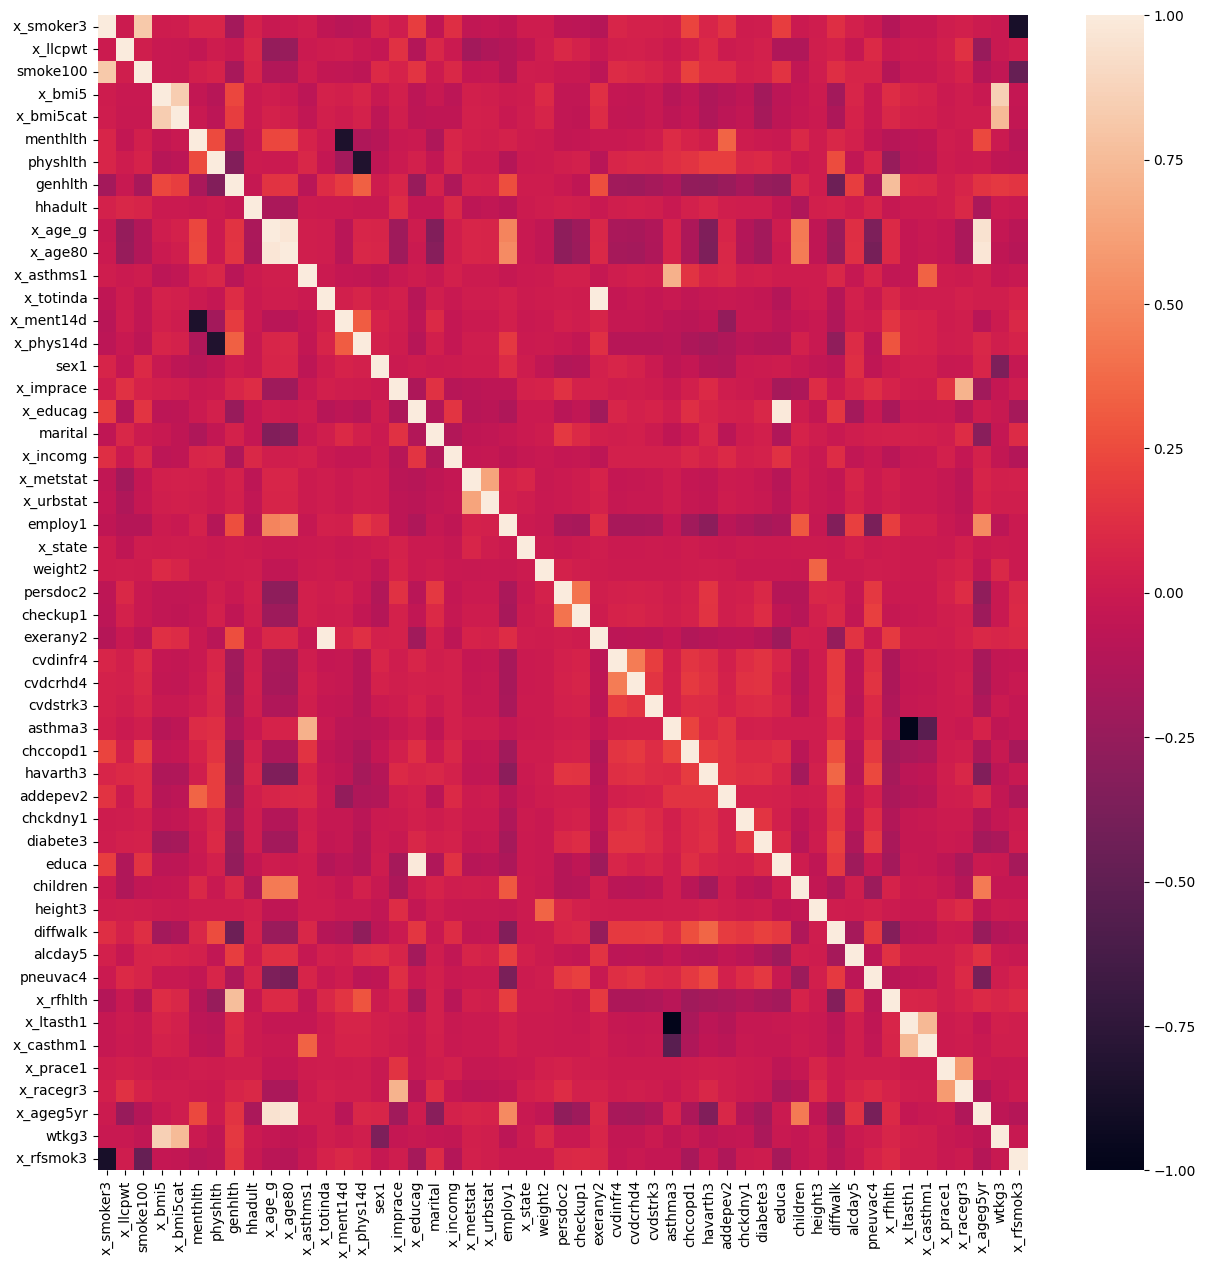

In [43]:
correlation = df2018[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df2018[res_na.index].corr())
plt.show()


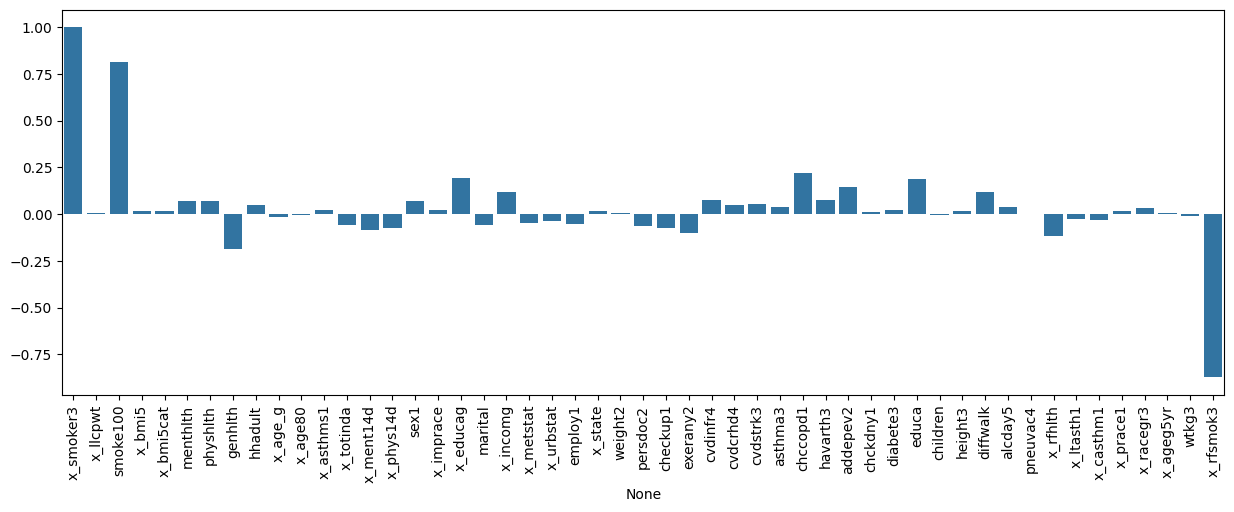

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


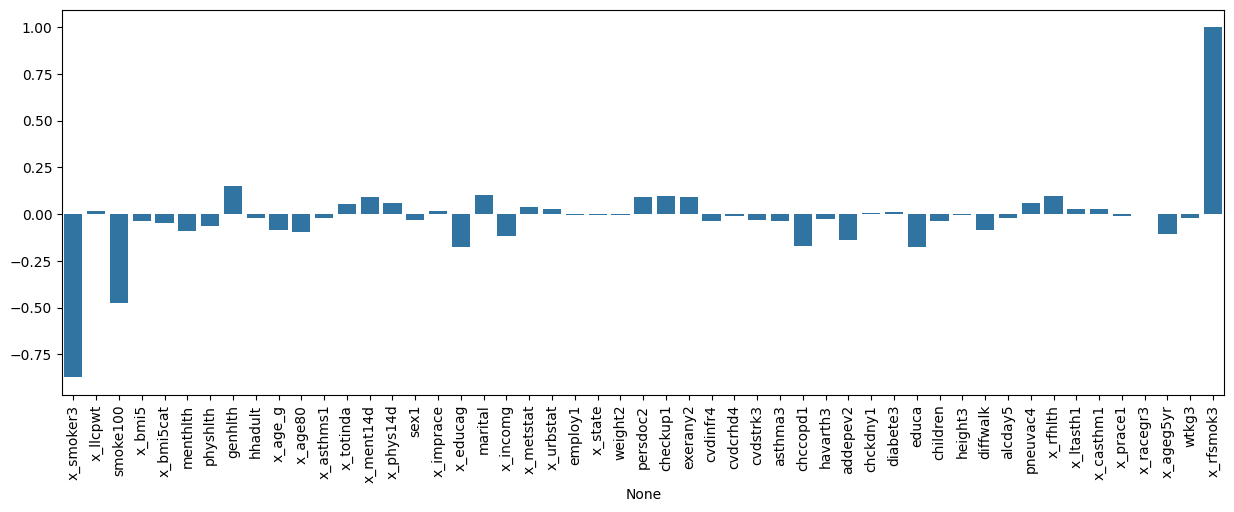

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [46]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [47]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [48]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [49]:
df2018_without_4_smoker3 = df2018.copy()

df2018_without_4_smoker3['x_smoker3'].replace(4, np.nan, inplace=True)

df2018_without_4_smoker3.dropna(subset=['x_smoker3'], inplace=True)

df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].map(mapping_dict)

df2018_without_4_smoker3['x_smoker3'].value_counts()


,count
x_smoker3,
1,111782
0,56422


In [51]:
X = df2018_without_4_smoker3[numerical_features+categorical_features]
y = df2018_without_4_smoker3["x_smoker3"]


In [52]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


np.float64(0.5047503175824373)

In [53]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (168204, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [54]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [55]:
weights = df2018_without_4_smoker3["x_llcpwt"]


## Feature Engineering

In [56]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      15938.905350
x_ageg5yr    15861.736752
x_age_g      13453.488568
marital       6326.737528
educa         5924.810985
x_educag      5703.909519
persdoc2      4080.803008
checkup1      3895.332314
pneuvac4      3767.899289
addepev2      3086.039334
menthlth      2807.637387
x_incomg      2785.103839
genhlth       2376.640691
x_ment14d     2234.633420
children      2225.739229
employ1       1511.879793
chccopd1      1486.317096
x_bmi5cat     1411.867273
exerany2      1348.382054
x_imprace     1247.100107
wtkg3         1021.600462
x_rfhlth       936.478445
x_bmi5         902.306098
x_totinda      641.225462
physhlth       594.958000
diabete3       584.001557
x_racegr3      511.867584
havarth3       509.429966
poorhlth       439.188136
cvdcrhd4       405.863118
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'x_age_g', 'marital', 'educ

Method 2: Recursive Feature Elimination (RFE)

In [68]:
# Initialize RFE. Select a base estimator and specify the number of features to select.
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# Fit RFE on the processed data (X_processed) and the target (y)
rfe_selector.fit(X_processed, y)

# Get the boolean mask of selected features and their ranking
selected_features_mask_rfe = rfe_selector.support_
feature_ranking_rfe = rfe_selector.ranking_

# Get the names of the selected features based on the mask
selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

print("Selected features by RFE:")
print(selected_features_names_rfe)


Selected features by RFE:
['num__x_age80', 'cat__x_bmi5cat', 'cat__x_age_g', 'cat__exerany2', 'cat__educa', 'cat__chccopd1', 'cat__addepev2']


Method 3: Feature Importance from RandomForestClassifier

In [57]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


Top features based on RandomForest feature importance:
num__x_age80      0.071498
num__x_bmi5       0.064940
cat__x_state      0.055458
num__wtkg3        0.052018
num__weight2      0.052000
cat__x_ageg5yr    0.046260
num__height3      0.045429
cat__marital      0.038653
cat__x_incomg     0.038090
num__alcday5      0.037572
cat__x_age_g      0.028810
num__hhadult      0.027963
cat__x_educag     0.025058
num__menthlth     0.024329
num__poorhlth     0.024318
cat__educa        0.024273
cat__genhlth      0.023713
num__physhlth     0.023433
cat__employ1      0.022868
cat__checkup1     0.018639
dtype: float64

Top 20 feature names selected by RandomForest importance:
['num__x_age80', 'num__x_bmi5', 'cat__x_state', 'num__wtkg3', 'num__weight2', 'cat__x_ageg5yr', 'num__height3', 'cat__marital', 'cat__x_incomg', 'num__alcday5', 'cat__x_age_g', 'num__hhadult', 'cat__x_educag', 'num__menthlth', 'num__poorhlth', 'cat__educa', 'cat__genhlth', 'num__physhlth', 'cat__employ1', 'cat__checkup1']


In [58]:
sorted_feature_importances_rf


,0
num__x_age80,0.071498
num__x_bmi5,0.064940
cat__x_state,0.055458
num__wtkg3,0.052018
num__weight2,0.052000
cat__x_ageg5yr,0.046260
num__height3,0.045429
cat__marital,0.038653
cat__x_incomg,0.038090
num__alcday5,0.037572


Variance Threshold

In [59]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)


تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 32
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__diabete3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [60]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): ['x_age_g', 'educa', 'x_ageg5yr']
تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: 48
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr']


### VIF Method

In [ ]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0

#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns

#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")

#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break

#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


KeyboardInterrupt: 

In [61]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


(168204, 24)

In [62]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df2018_without_4_smoker3[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

# White/Black box models on VIF/ALL features

In [63]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time


    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")


    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()

    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)

        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20))
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5)
        plt.title(f"Decision Tree for {model_name}")
        plt.show()

        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)

        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),

    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 2.23 seconds.
Accuracy: 0.6924 | F1-Score: 0.6999 | AUC: 0.7582


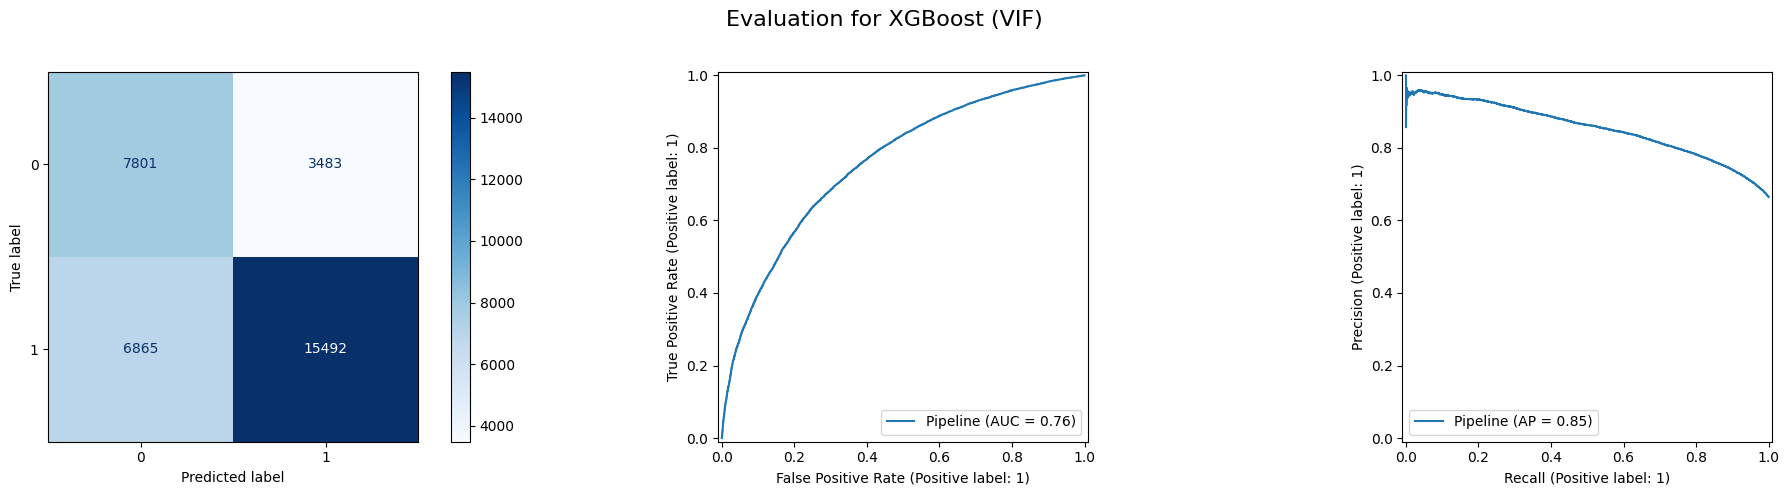


--- SHAP Analysis for XGBoost (VIF) ---


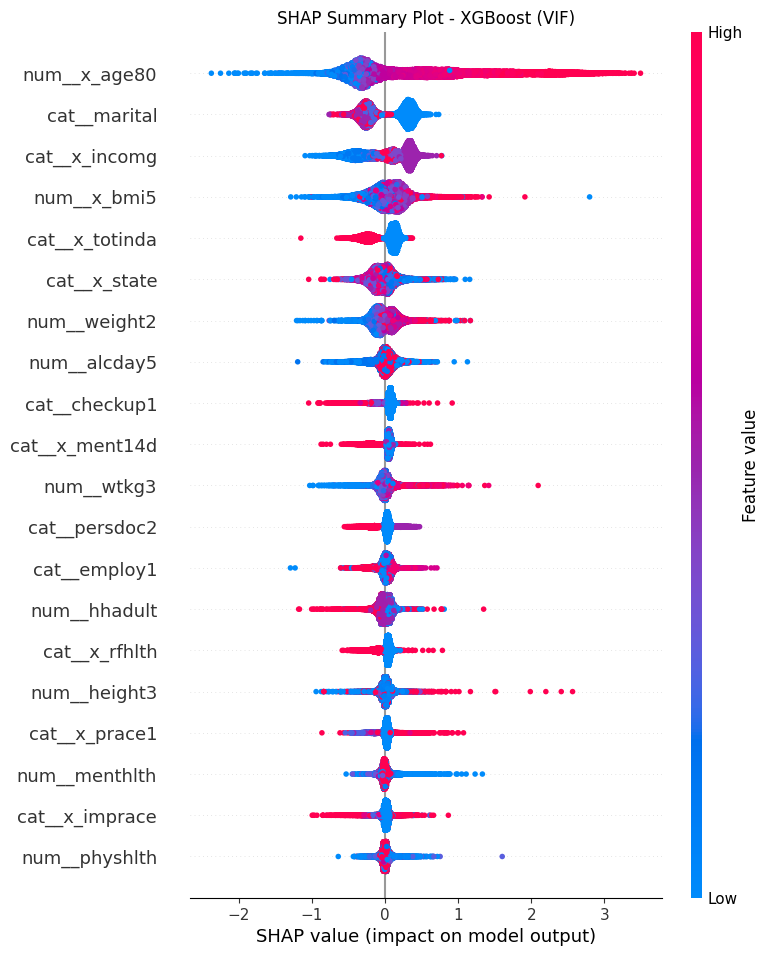


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 89425, number of negative: 45138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 134563, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612503 -> initscore=0.457844
[LightGBM] [Info] Start training from score 0.457844
Training completed in 4.18 seconds.
Accuracy: 0.6934 | F1-Score: 0.7016 | AUC: 0.7702


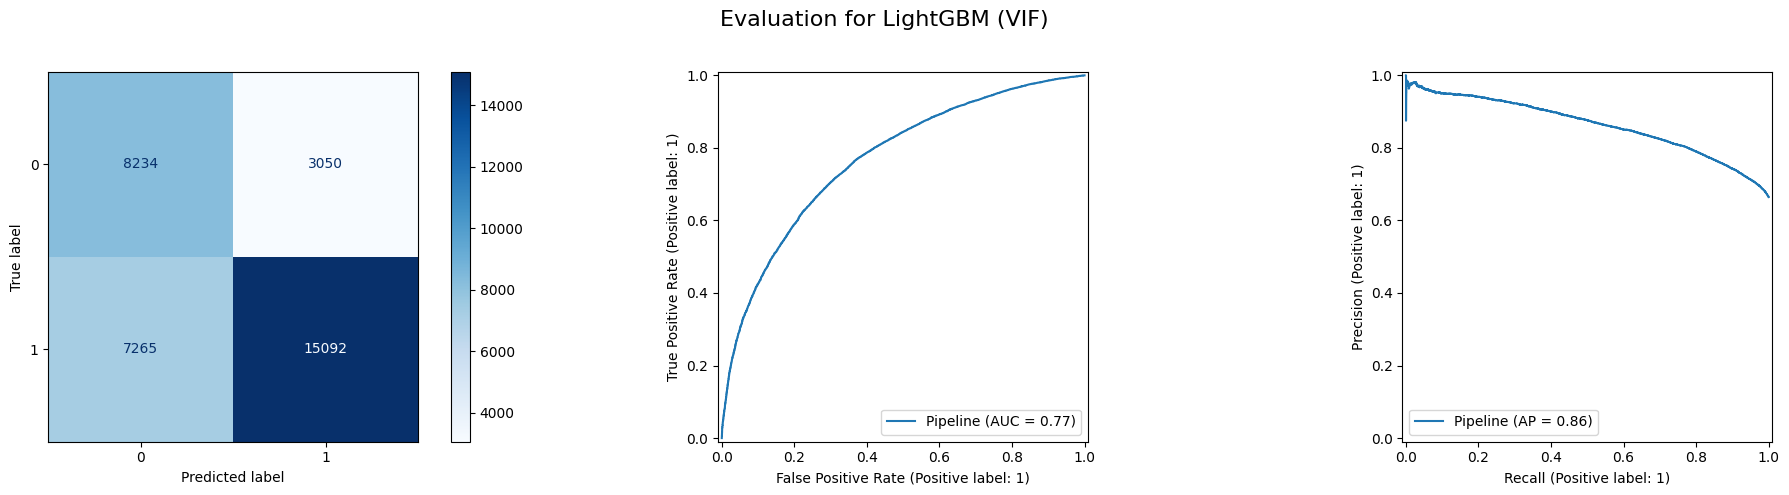


--- SHAP Analysis for LightGBM (VIF) ---


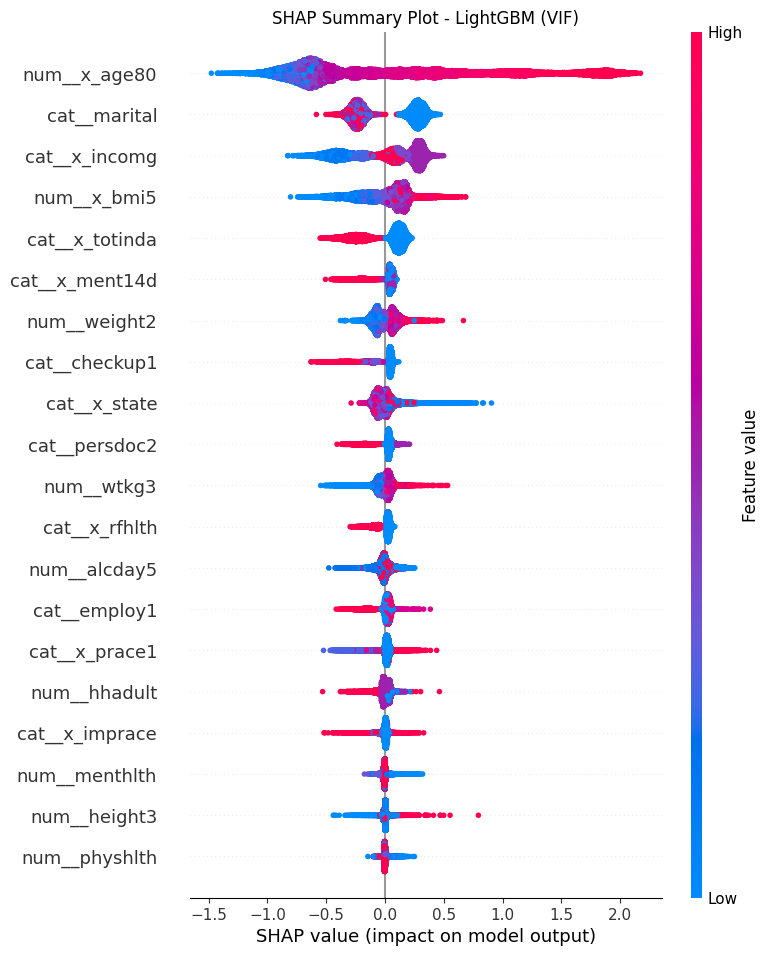


===== Training model: CatBoost (VIF) =====
Training completed in 71.67 seconds.
Accuracy: 0.6989 | F1-Score: 0.7064 | AUC: 0.7693


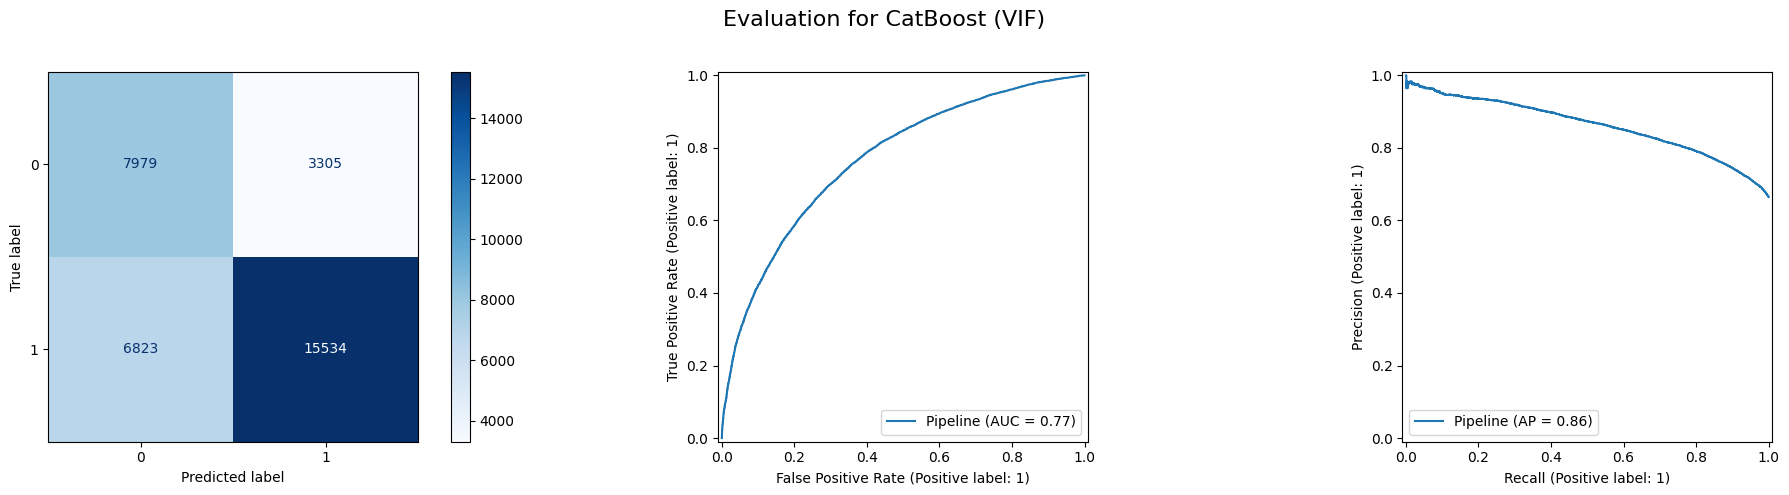


--- SHAP Analysis for CatBoost (VIF) ---


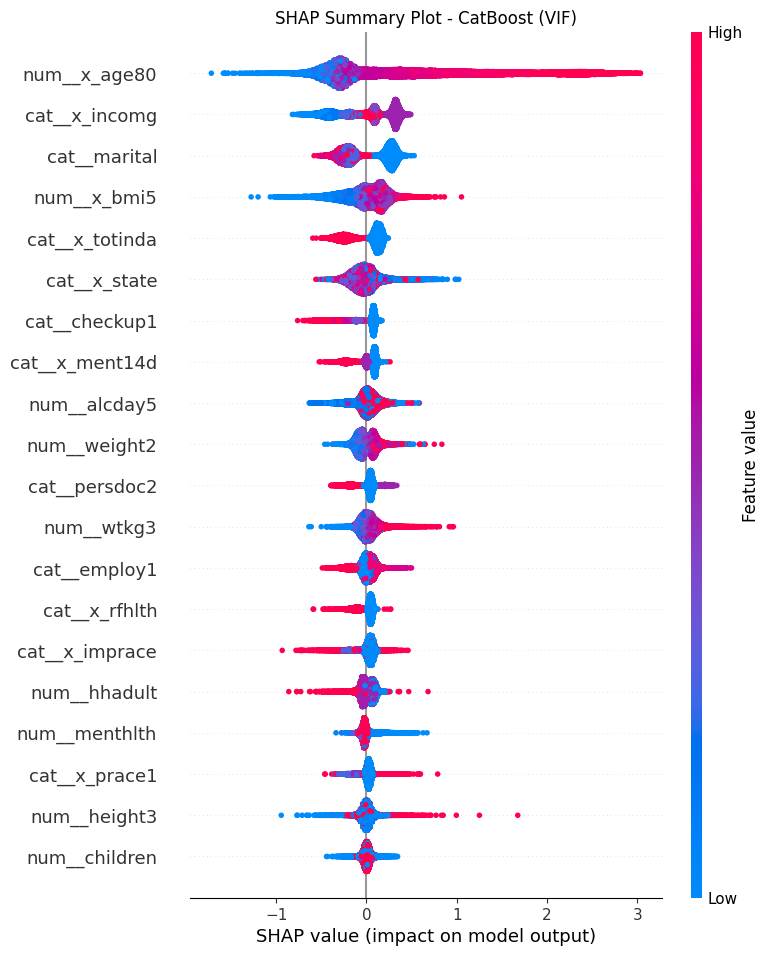


===== Training model: Logistic Regression (VIF) =====
Training completed in 9.85 seconds.
Accuracy: 0.7019 | F1-Score: 0.6708 | AUC: 0.7308


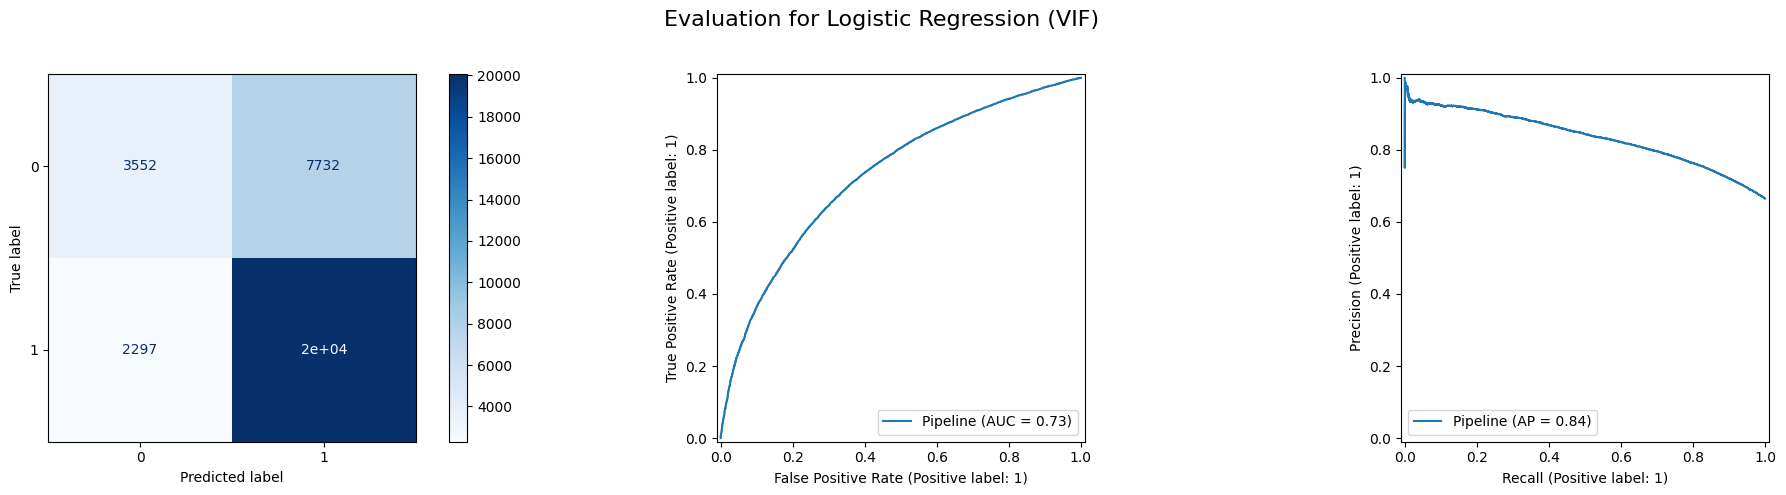


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.510796    1.666618
23   cat__x_rfhlth    -0.232127    0.792846
3       num__wtkg3     0.160870    1.174533
17    cat__marital    -0.118290    0.888438
22   cat__checkup1    -0.106673    0.898820
21   cat__persdoc2    -0.094565    0.909769
12  cat__x_totinda    -0.090717    0.913276
13  cat__x_ment14d    -0.083807    0.919609
18   cat__x_incomg     0.079793    1.083063
10   num__poorhlth     0.034832    1.035445
5    num__children    -0.027876    0.972509
7     num__alcday5    -0.027448    0.972926
11  cat__x_casthm1    -0.027354    0.973017
14  cat__x_phys14d    -0.023267    0.977001
19    cat__employ1    -0.020615    0.979596
6     num__hhadult    -0.020286    0.979918
9    num__physhlth     0.016251    1.016384
1      num__x_bmi5     0.009691    1.009738
15  cat__x_imprace    -0.009118    0.990924
2     num__weight2     0.007521    1.007549
4     num__height3     0.007171    1.007197
20

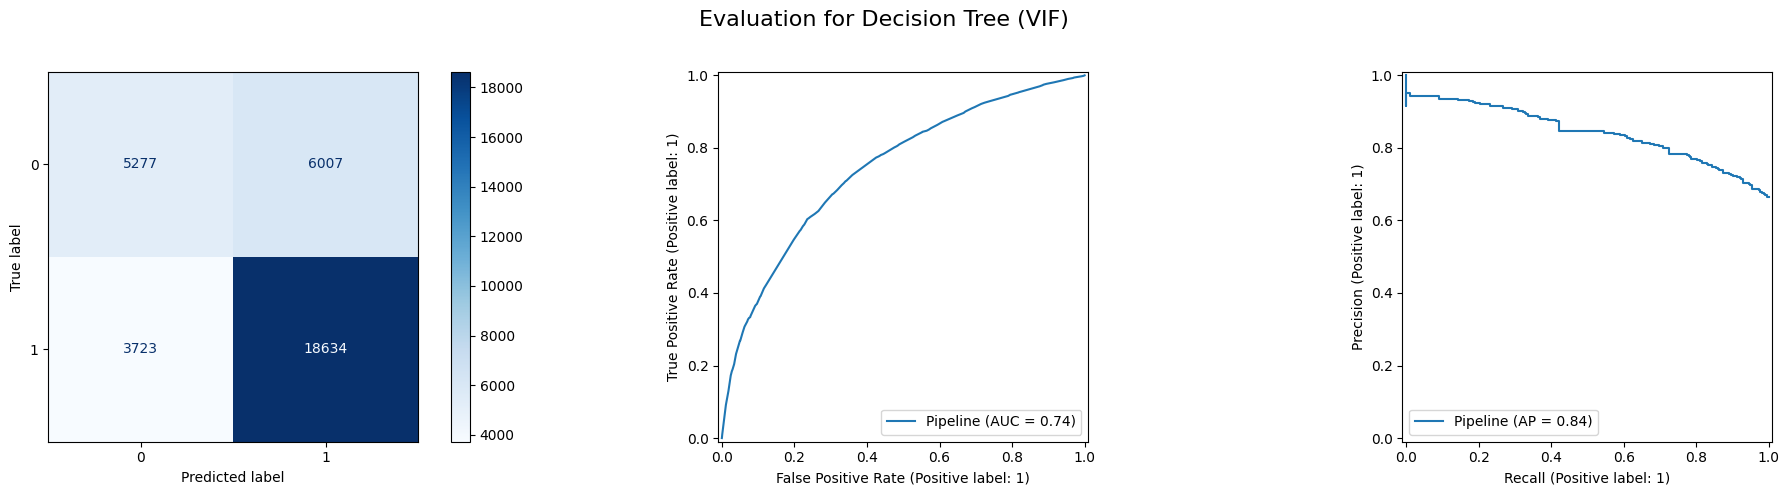


--- Decision Tree Analysis ---


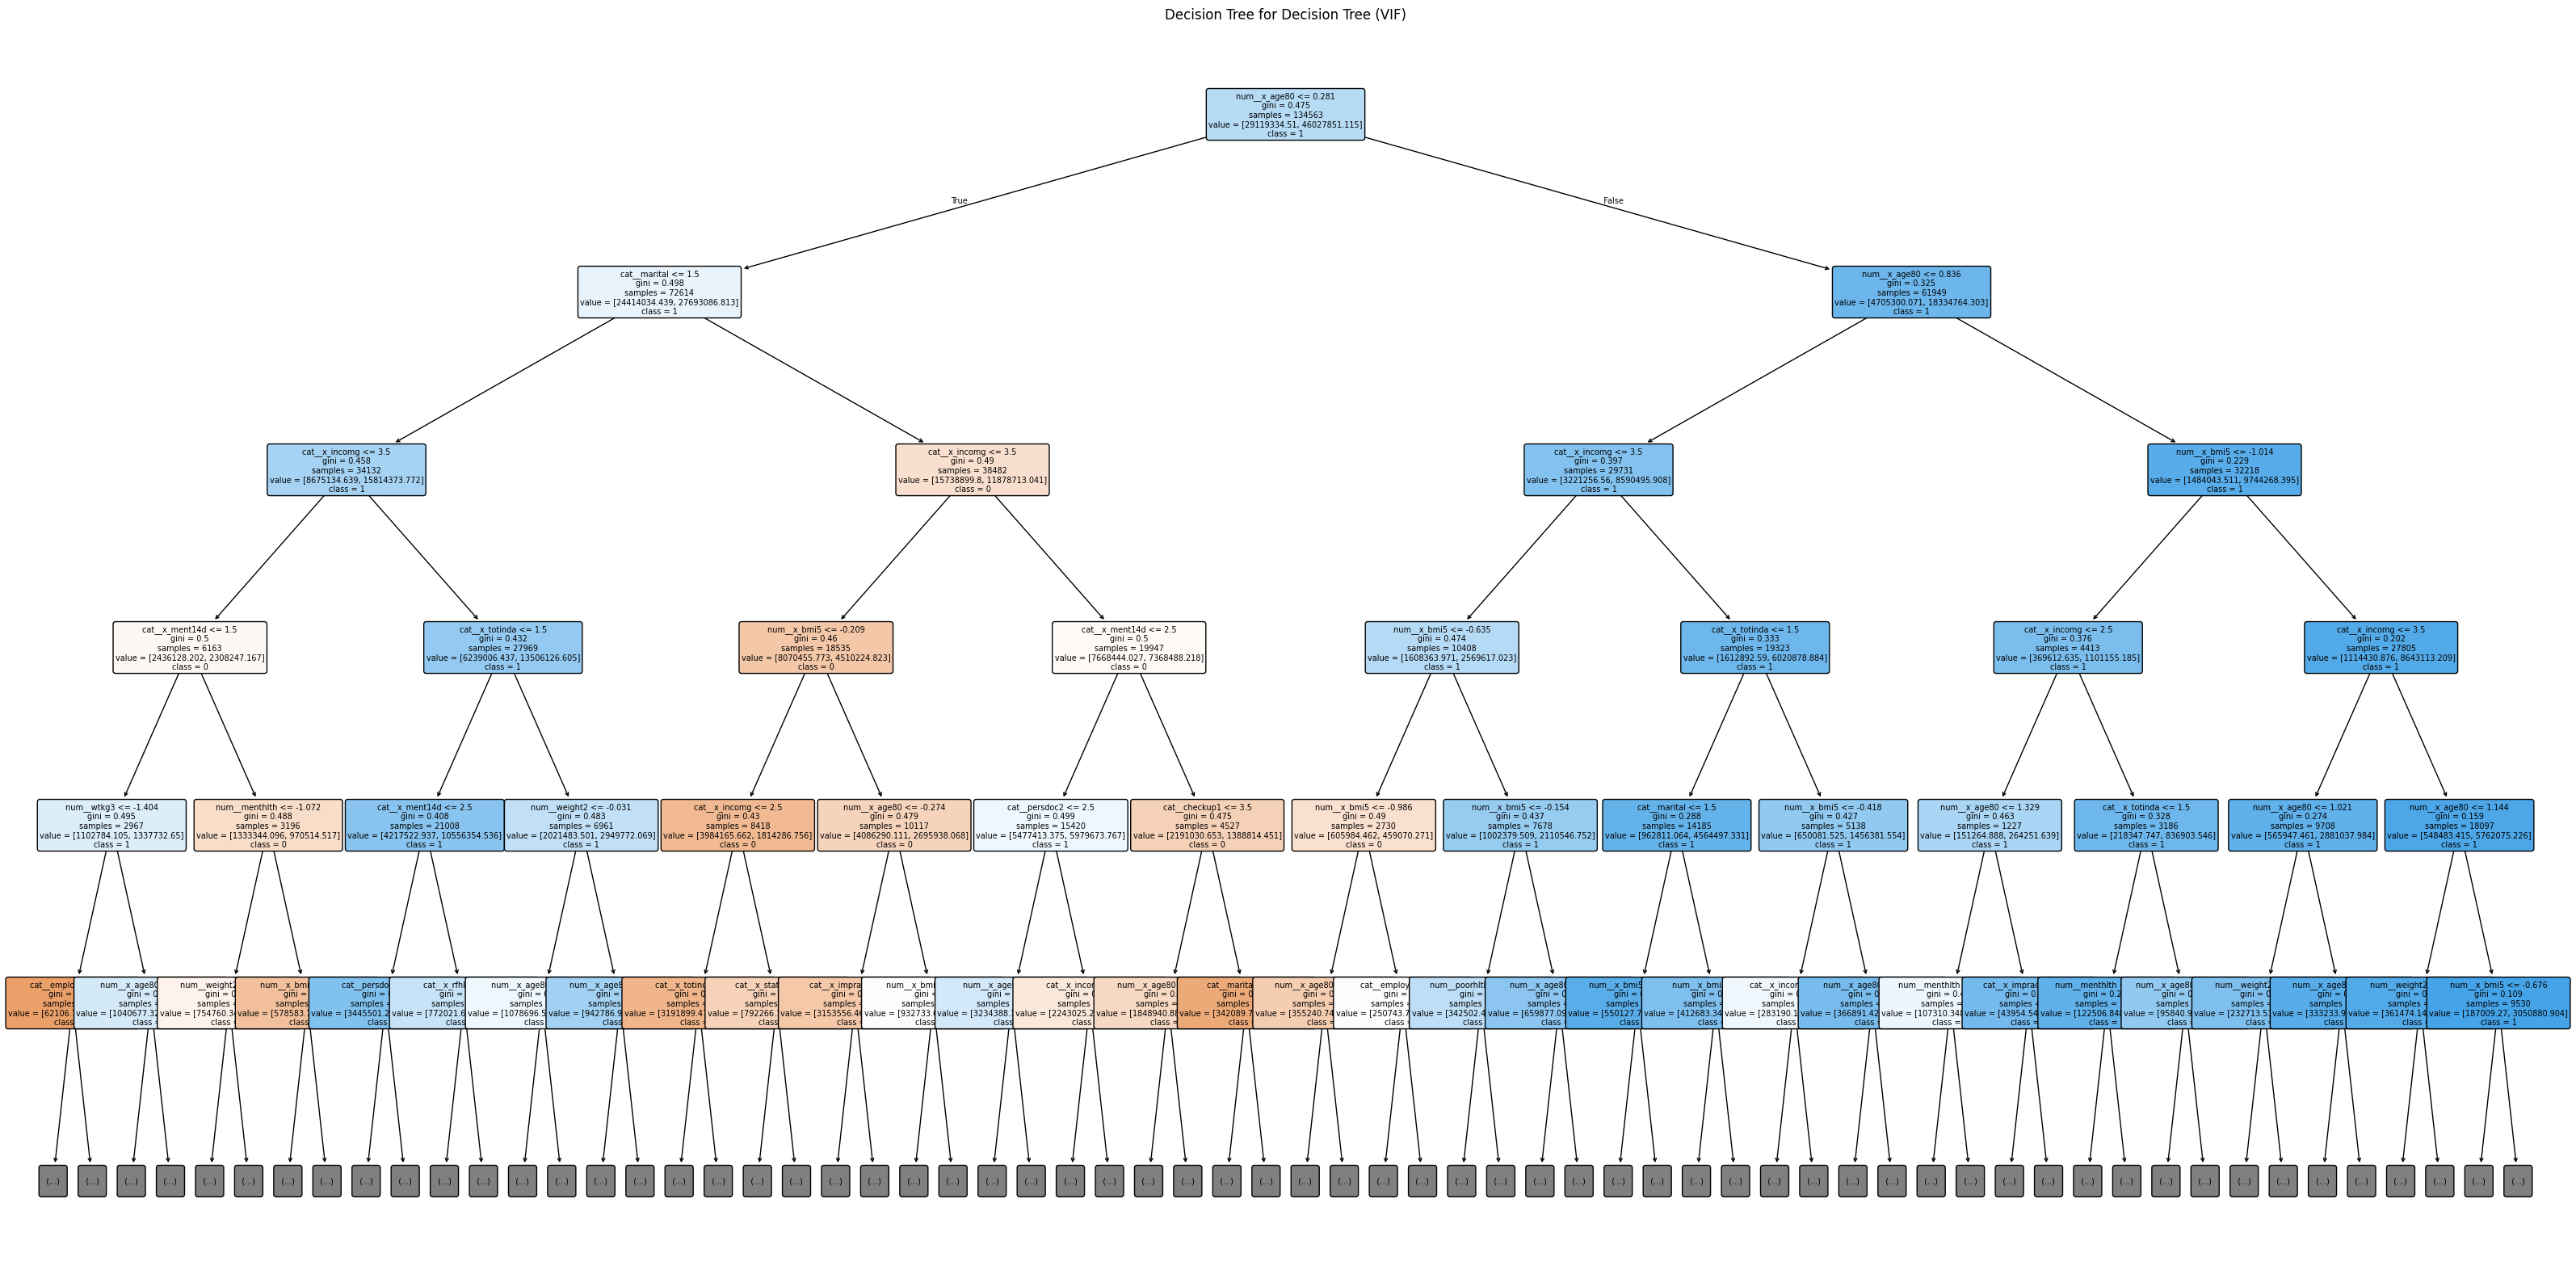

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.28
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 3.50
|   |   |   |--- cat__x_ment14d <= 1.50
|   |   |   |   |--- num__wtkg3 <= -1.40
|   |   |   |   |   |--- cat__employ1 <= 1.50
|   |   |   |   |   |   |--- num__children <= -1.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__children >  -1.82
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cat__employ1 >  1.50
|   |   |   |   |   |   |--- num__x_age80 <= 0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__x_age80 >  0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- num__wtkg3 >  -1.40
|   |   |   |   |   |--- num__x_age80 <= -0.34
|   |   |   |   |   |   |--- num__x_age80 <= -1.32
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__x_age80 >  -1.32

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training complet

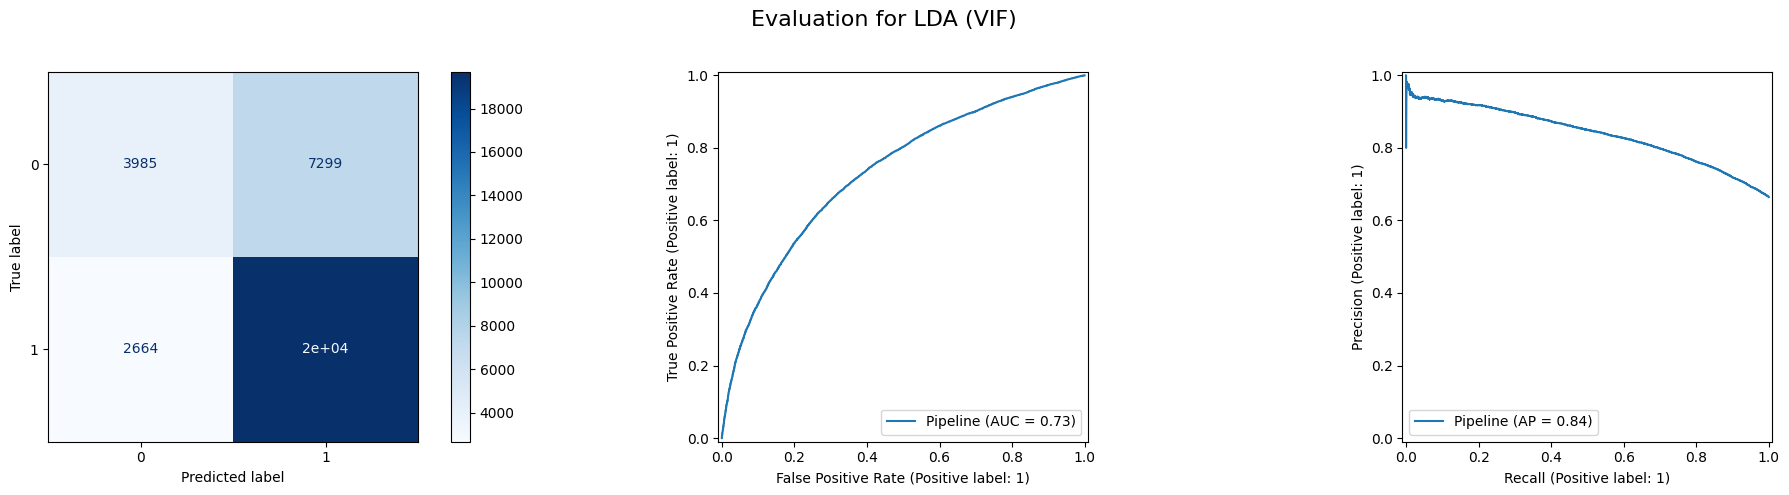


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.692751
23   cat__x_rfhlth    -0.223330
3       num__wtkg3     0.199126
22   cat__checkup1    -0.161935
12  cat__x_totinda    -0.125556
17    cat__marital    -0.114870
21   cat__persdoc2    -0.107552
18   cat__x_incomg     0.088211
13  cat__x_ment14d    -0.076852
7     num__alcday5    -0.067105
1      num__x_bmi5     0.063105
10   num__poorhlth     0.041293
5    num__children    -0.039911
19    cat__employ1    -0.034354
9    num__physhlth     0.030801
8    num__menthlth     0.025576
15  cat__x_imprace    -0.024194
14  cat__x_phys14d    -0.022389
4     num__height3     0.018416
11  cat__x_casthm1    -0.014599
6     num__hhadult    -0.012319
16   cat__x_prace1     0.001609
2     num__weight2     0.000645
20    cat__x_state    -0.000561


In [64]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 6.26 seconds.
Accuracy: 0.7084 | F1-Score: 0.7149 | AUC: 0.7745


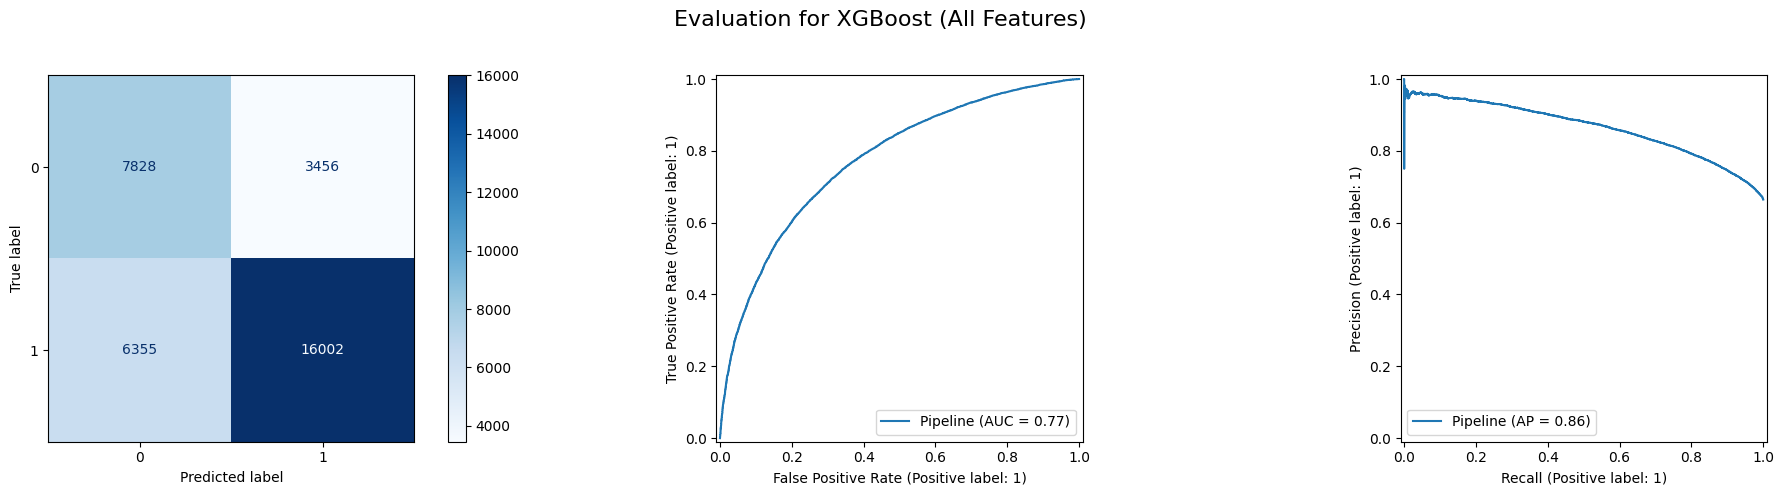


--- SHAP Analysis for XGBoost (All Features) ---


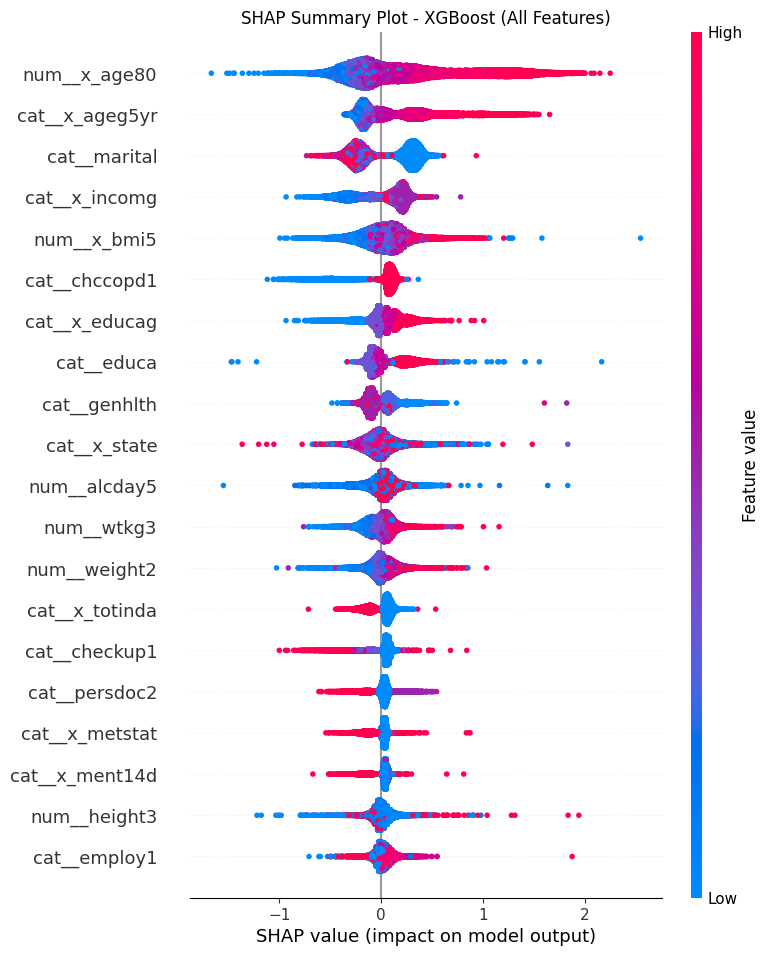


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 89425, number of negative: 45138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 134563, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612503 -> initscore=0.457844
[LightGBM] [Info] Start training from score 0.457844
Training completed in 4.98 seconds.
Accuracy: 0.7101 | F1-Score: 0.7174 | AUC: 0.7845


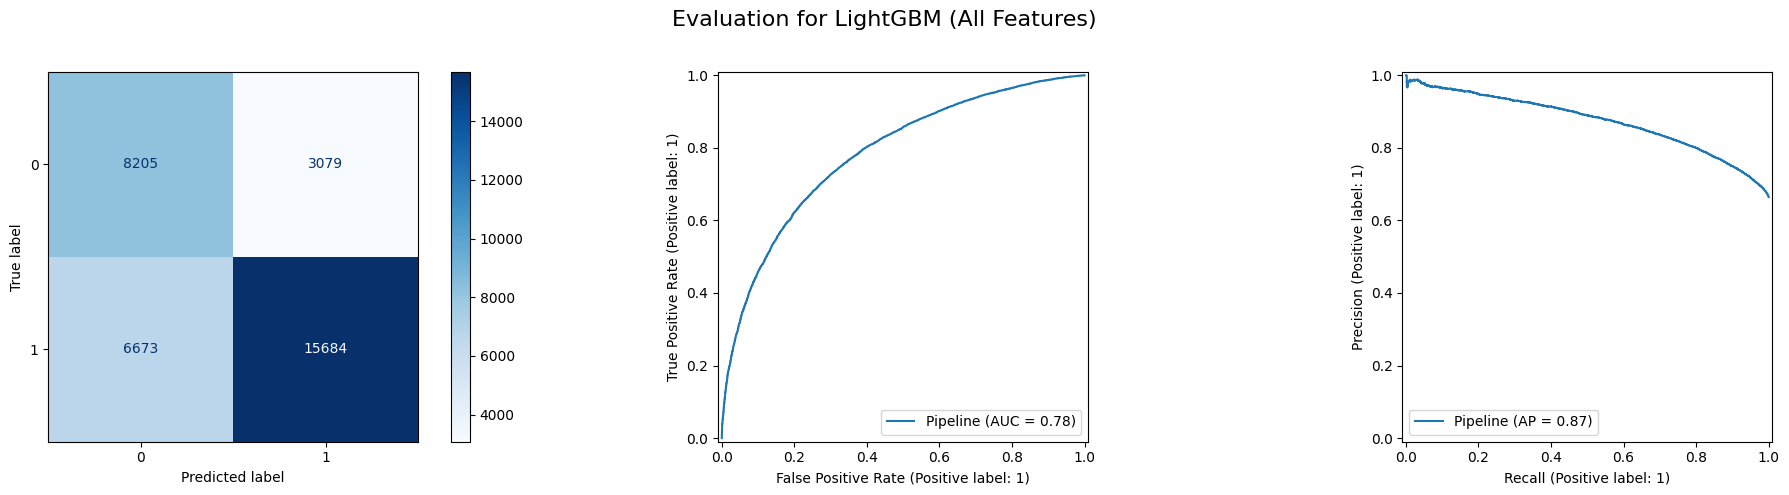


--- SHAP Analysis for LightGBM (All Features) ---


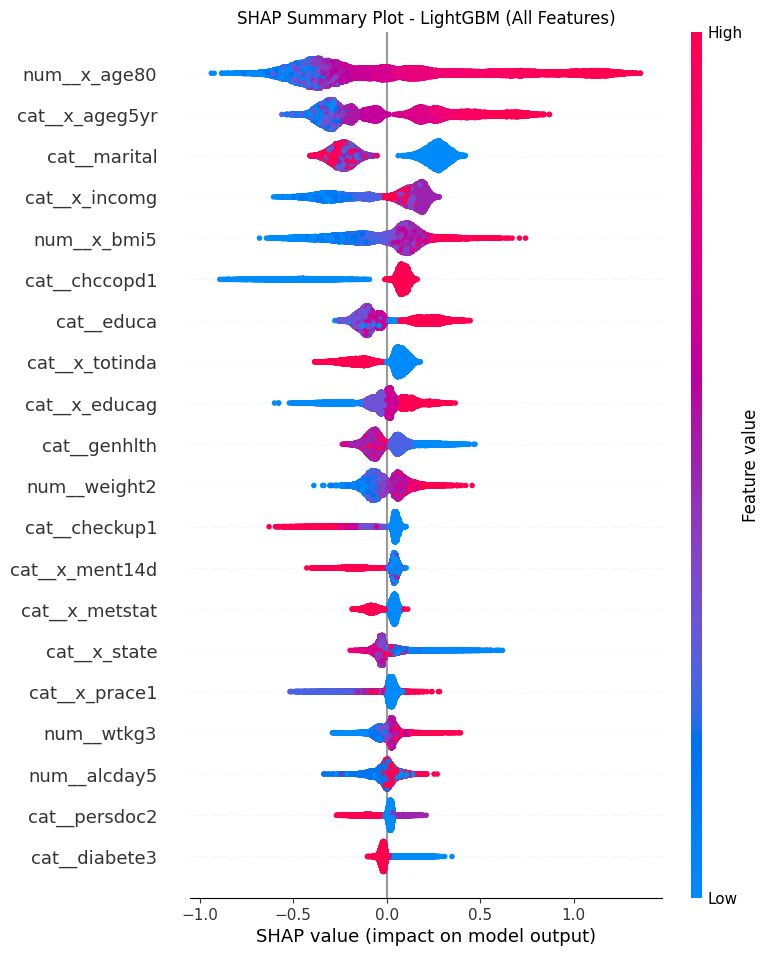


===== Training model: CatBoost (All Features) =====
Training completed in 72.33 seconds.
Accuracy: 0.7140 | F1-Score: 0.7207 | AUC: 0.7852


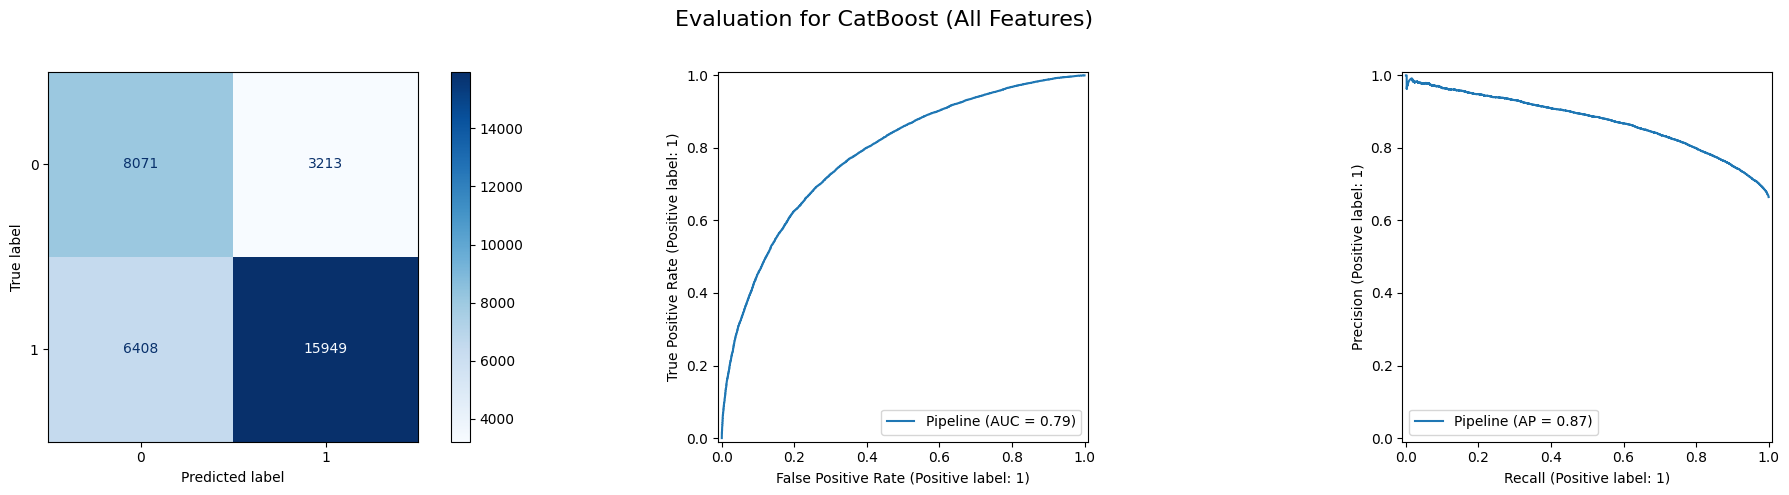


--- SHAP Analysis for CatBoost (All Features) ---


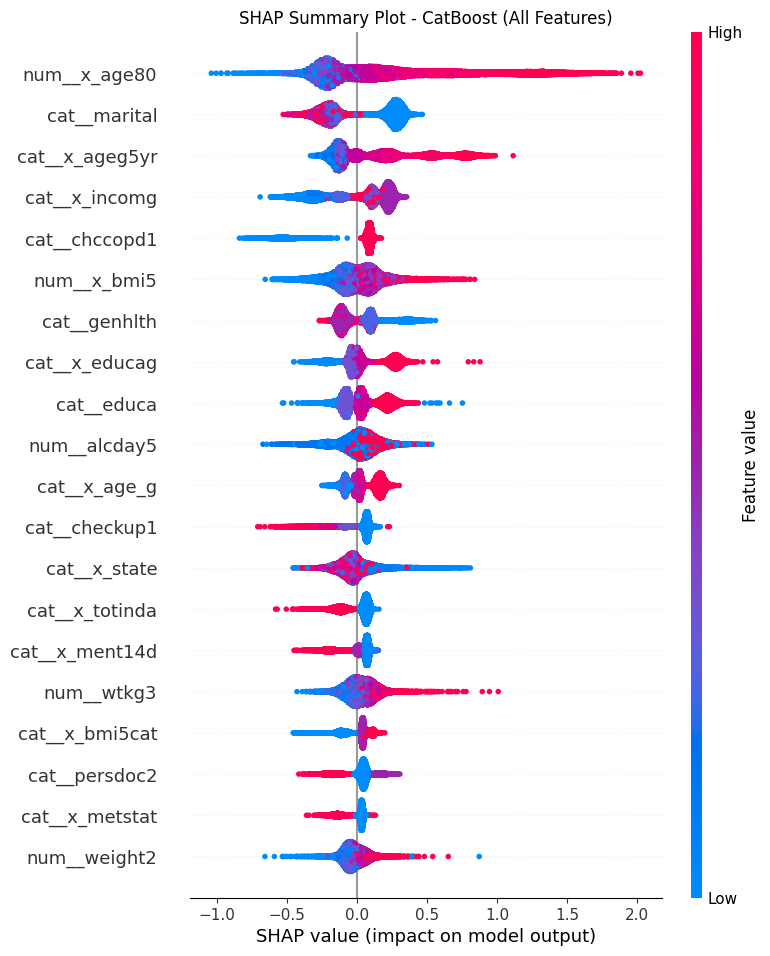


===== Training model: Logistic Regression (All Features) =====
Training completed in 29.55 seconds.
Accuracy: 0.7214 | F1-Score: 0.7031 | AUC: 0.7587


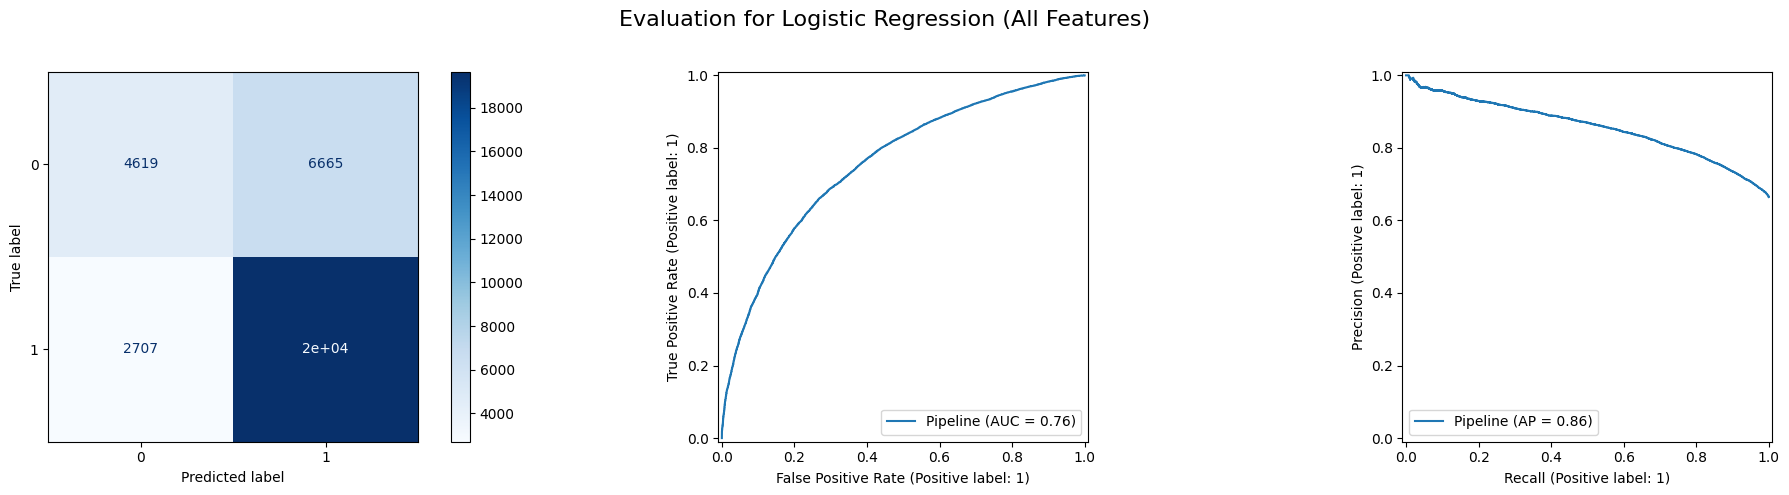


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.847920    2.334785
39   cat__chccopd1     0.637118    1.891024
13    cat__x_age_g    -0.461217    0.630516
42   cat__chckdny1    -0.341690    0.710569
36   cat__cvdcrhd4    -0.311699    0.732202
29  cat__x_metstat    -0.256729    0.773578
38    cat__asthma3    -0.246600    0.781453
41   cat__addepev2     0.235427    1.265449
18   cat__exerany2    -0.233452    0.791796
45   cat__pneuvac4    -0.183205    0.832597
44   cat__diffwalk     0.160222    1.173771
12    cat__genhlth    -0.158927    0.853059
26      cat__educa     0.153316    1.165693
25   cat__x_educag     0.137980    1.147953
21       cat__sex1    -0.126604    0.881082
27    cat__marital    -0.121499    0.885592
43   cat__diabete3    -0.113952    0.892300
35   cat__cvdinfr4     0.113014    1.119648
47  cat__x_ageg5yr     0.108686    1.114812
1      num__x_bmi5     0.103786    1.109363
30  cat__x_urbstat     0.097248    1.102134
34

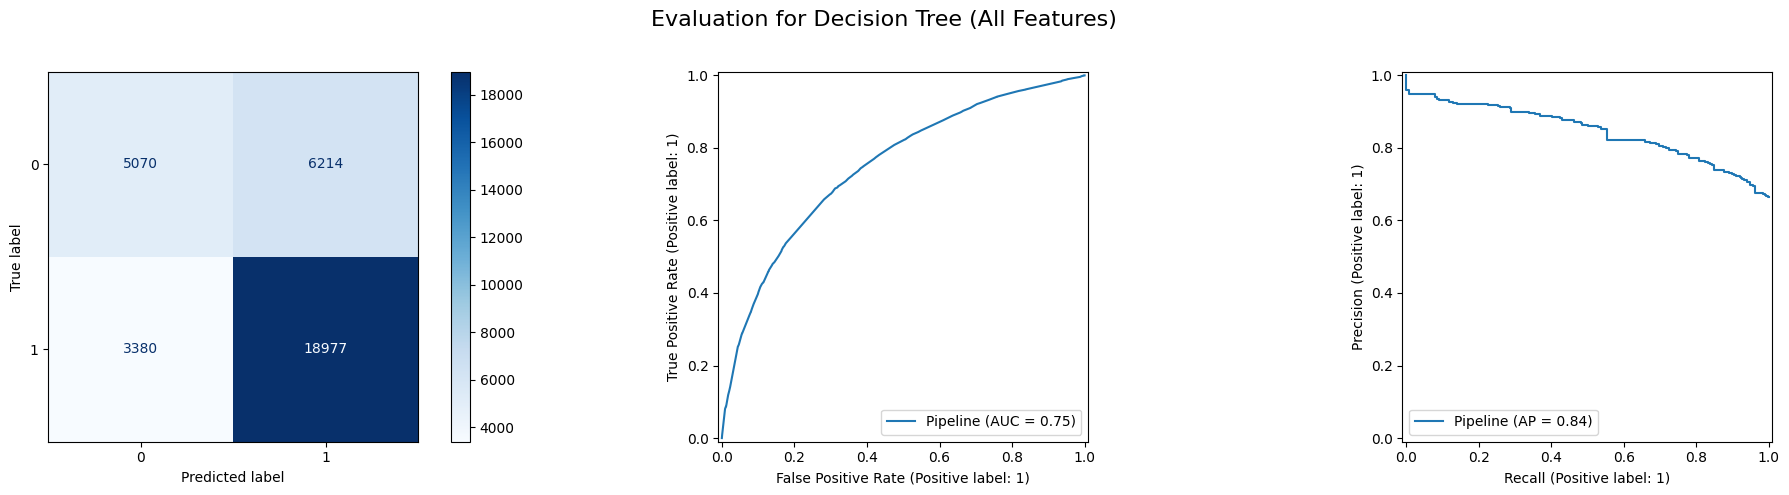


--- Decision Tree Analysis ---


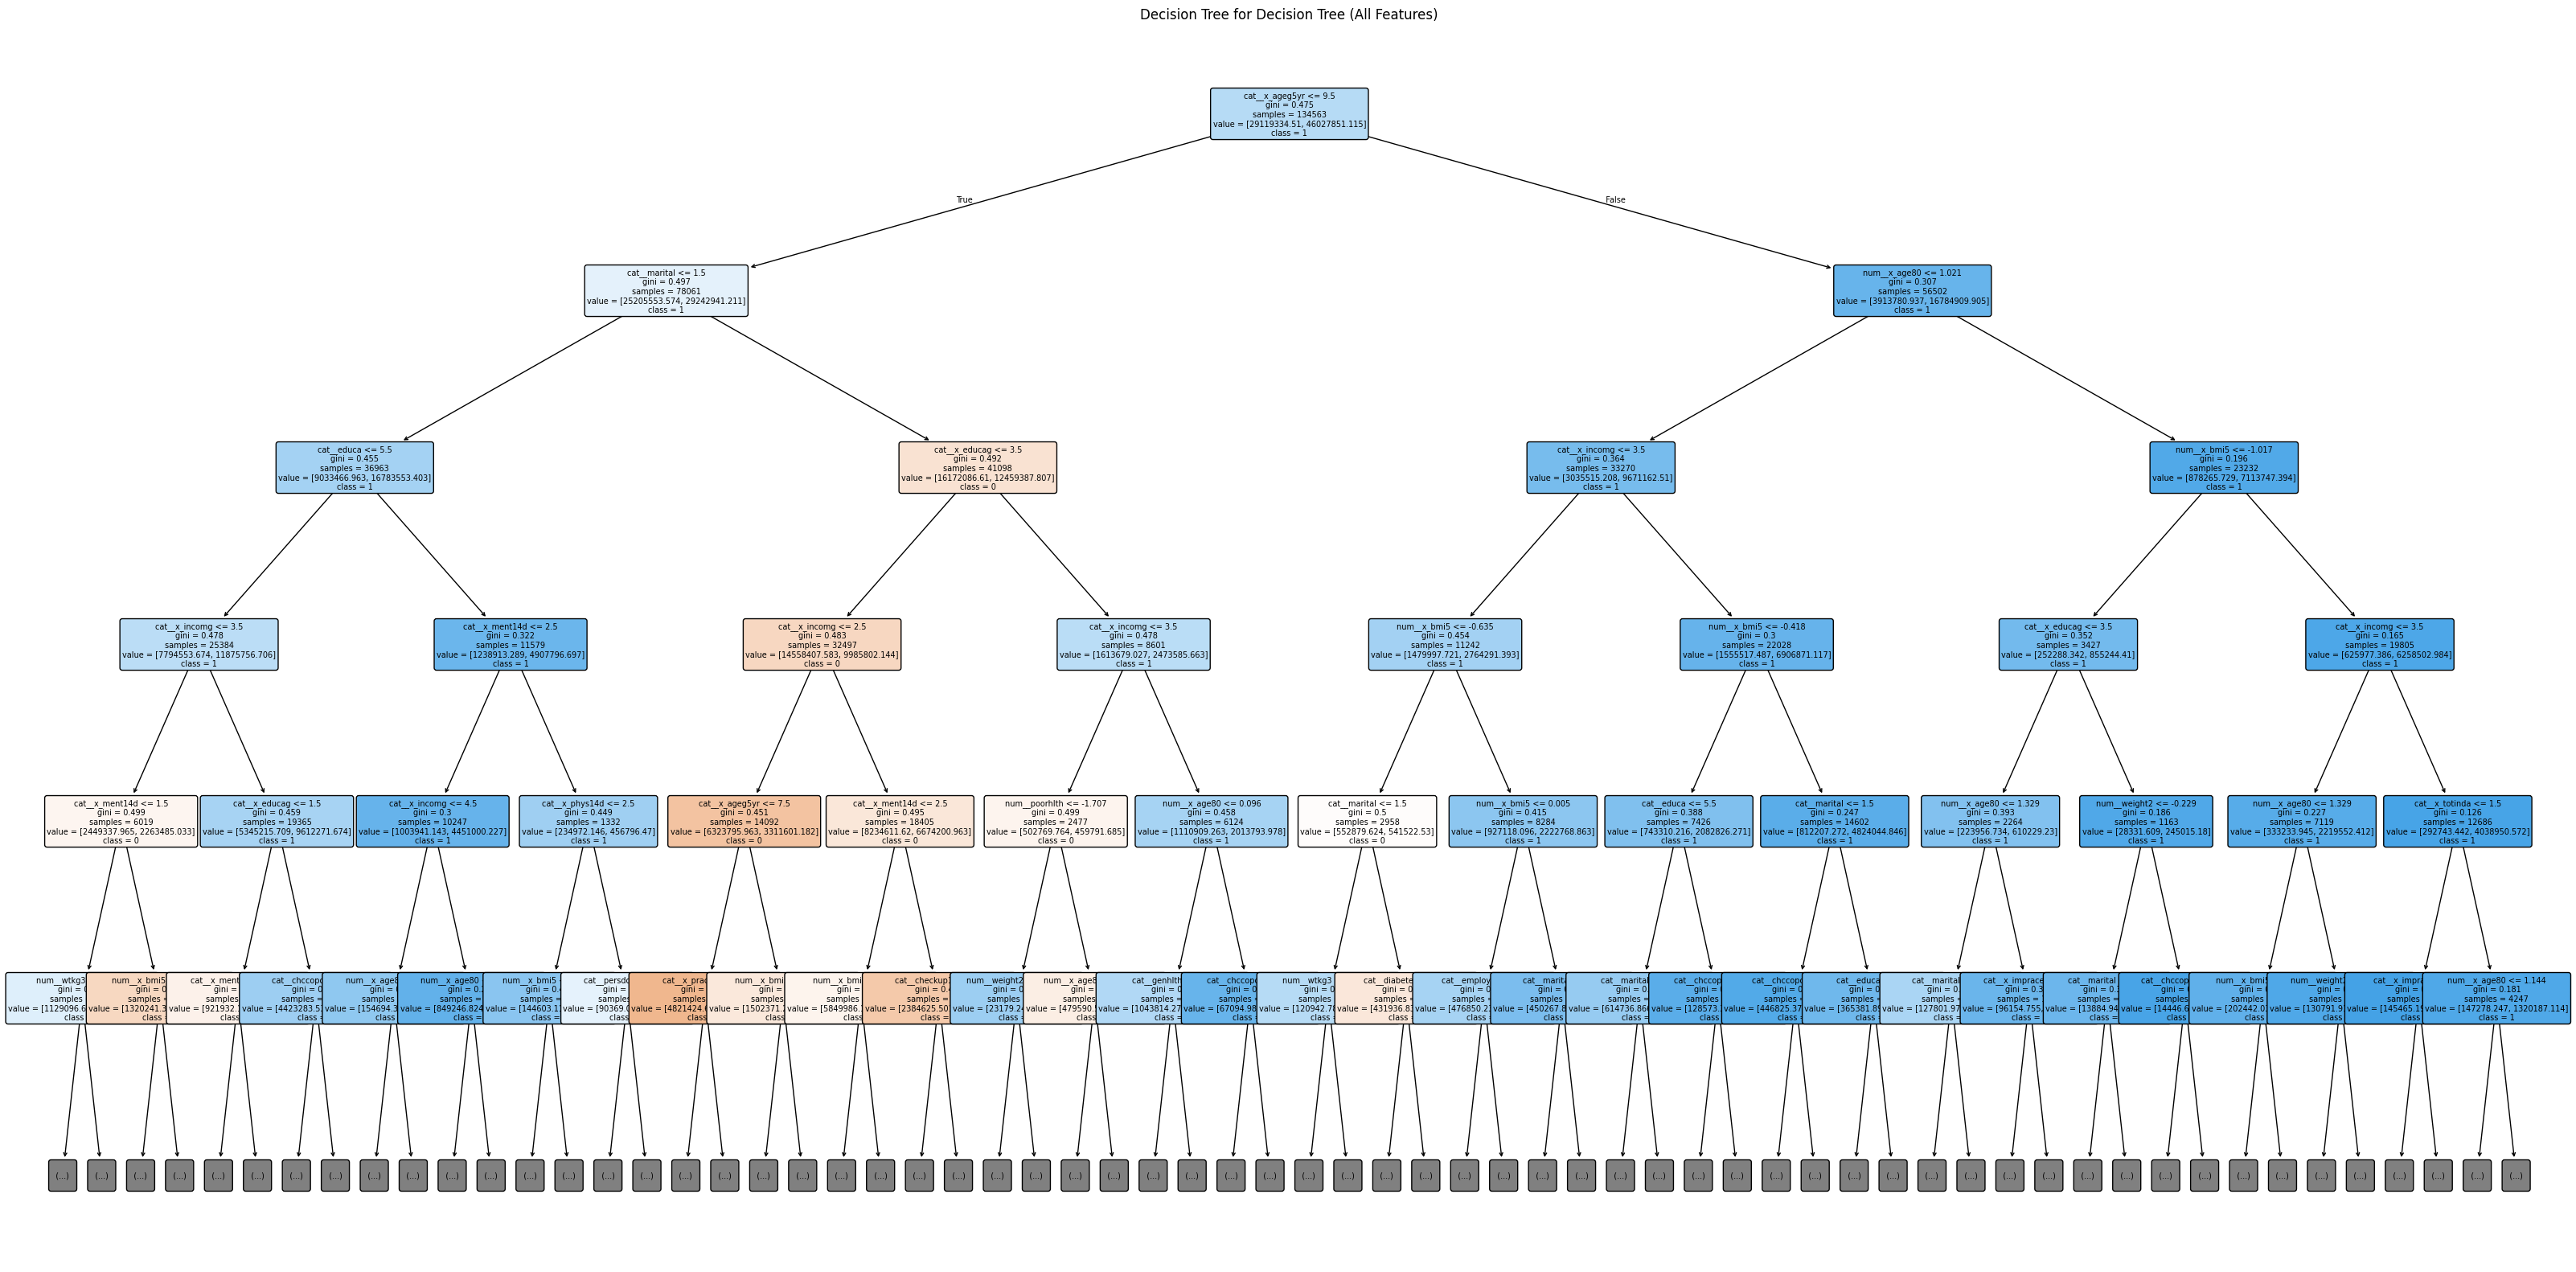

Tree Rules (first few levels):
 |--- cat__x_ageg5yr <= 9.50
|   |--- cat__marital <= 1.50
|   |   |--- cat__educa <= 5.50
|   |   |   |--- cat__x_incomg <= 3.50
|   |   |   |   |--- cat__x_ment14d <= 1.50
|   |   |   |   |   |--- num__wtkg3 <= -1.40
|   |   |   |   |   |   |--- cat__checkup1 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__checkup1 >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- num__wtkg3 >  -1.40
|   |   |   |   |   |   |--- num__x_age80 <= -0.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__x_age80 >  -0.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- cat__x_ment14d >  1.50
|   |   |   |   |   |--- num__x_bmi5 <= -0.57
|   |   |   |   |   |   |--- num__x_age80 <= -2.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__x_age80 >  -2.25

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
Traini

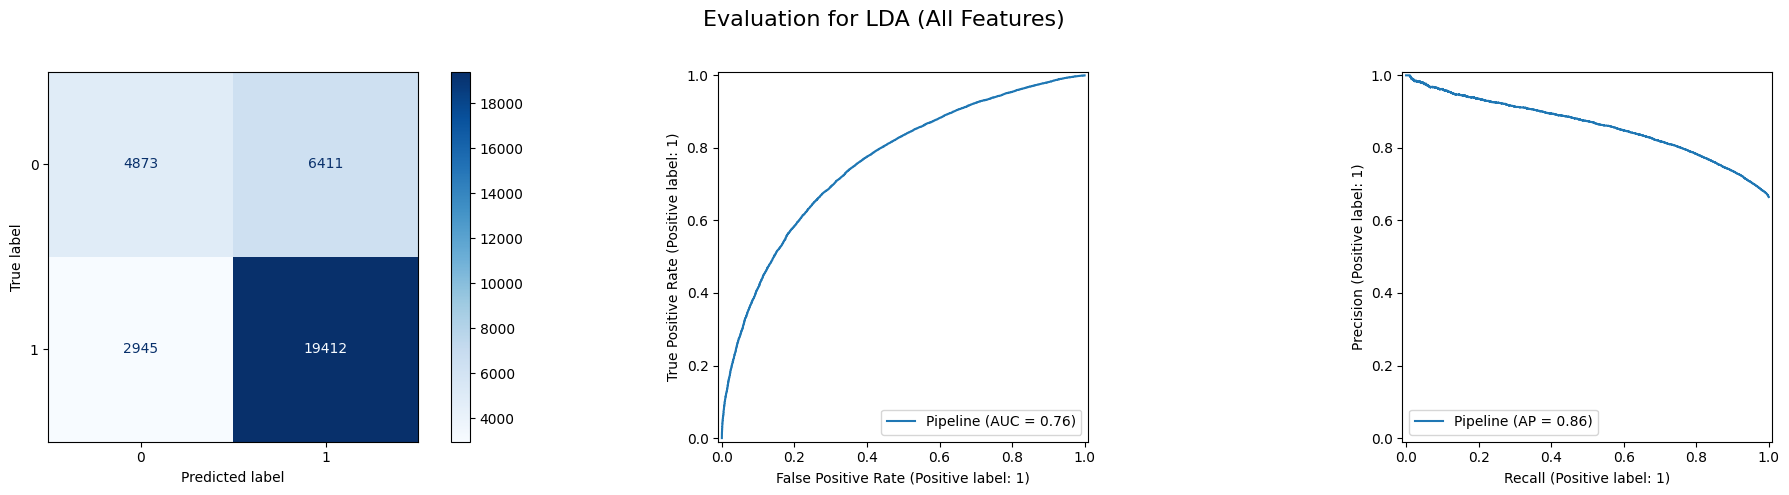


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.991567
39   cat__chccopd1     0.661639
13    cat__x_age_g    -0.462537
38    cat__asthma3    -0.372796
42   cat__chckdny1    -0.279215
18   cat__exerany2    -0.269998
41   cat__addepev2     0.263360
26      cat__educa     0.213191
36   cat__cvdcrhd4    -0.212780
12    cat__genhlth    -0.192576
45   cat__pneuvac4    -0.171763
29  cat__x_metstat    -0.151738
34   cat__checkup1    -0.145146
11  cat__x_bmi5cat     0.136471
44   cat__diffwalk     0.128354
1      num__x_bmi5     0.126841
27    cat__marital    -0.124357
21       cat__sex1    -0.109206
47  cat__x_ageg5yr     0.103243
33   cat__persdoc2    -0.097303
14  cat__x_asthms1     0.093629
3       num__wtkg3     0.084712
16  cat__x_casthm1    -0.081660
35   cat__cvdinfr4     0.079189
37   cat__cvdstrk3     0.072759
43   cat__diabete3    -0.070218
25   cat__x_educag     0.070040
28   cat__x_incomg     0.061470
19  cat__x_ment14d    -0.056113
46   cat__

In [65]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [66]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC   Time (s)
Model                                                                      
CatBoost (All Features)             0.714010  0.720739  0.785215  72.329103
LightGBM (All Features)             0.710116  0.717359  0.784457   4.980072
XGBoost (All Features)              0.708362  0.714851  0.774493   6.256497
LightGBM (VIF)                      0.693380  0.701551  0.770151   4.183367
CatBoost (VIF)                      0.698939  0.706385  0.769282  71.674012
LDA (All Features)                  0.721887  0.706659  0.762383   1.375426
Logistic Regression (All Features)  0.721411  0.703113  0.758693  29.551732
XGBoost (VIF)                       0.692399  0.699859  0.758241   2.234063
Decision Tree (All Features)        0.714812  0.702833  0.749500   2.121832
Decision Tree (VIF)                 0.710770  0.701514  0.743757   1.100424
LDA (VIF)                           0.703844  0.679479  0.734179

### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [67]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components: تعداد مؤلفه‌ها
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

# ۴. آموزش پایپ‌لاین با استفاده از وزن‌ها (sample_weight)
print("\nآموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...")
pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
print("آموزش کامل شد.")

# ۵. بررسی نتایج PCA
# می‌توانیم ببینیم PCA چند مؤلفه را انتخاب کرده است
num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"\nتعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): {num_components}")

# ۶. ارزیابی مدل نهایی
y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\n--- نتایج مدل Logistic Regression پس از PCA ---")
print(f"دقت (Accuracy): {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))



آموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...
آموزش کامل شد.

تعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): 4

--- نتایج مدل Logistic Regression پس از PCA ---
دقت (Accuracy): 0.6813

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.17      0.26     11284
           1       0.69      0.94      0.80     22357

    accuracy                           0.68     33641
   macro avg       0.64      0.55      0.53     33641
weighted avg       0.66      0.68      0.62     33641

